# Automatic Ticket Classification
-By: Madhusmita Ghosh

## Problem Statement 

You need to build a model that is able to classify customer complaints based on the products/services. By doing so, you can segregate these tickets into their relevant categories and, therefore, help in the quick resolution of the issue.

You will be doing topic modelling on the <b>.json</b> data provided by the company. Since this data is not labelled, you need to apply NMF to analyse patterns and classify tickets into the following five clusters based on their products/services:

* Credit card / Prepaid card

* Bank account services

* Theft/Dispute reporting

* Mortgages/loans

* Others 


With the help of topic modelling, you will be able to map each ticket onto its respective department/category. You can then use this data to train any supervised model such as logistic regression, decision tree or random forest. Using this trained model, you can classify any new customer complaint support ticket into its relevant department.

## Pipelines that needs to be performed:

You need to perform the following eight major tasks to complete the assignment:

1.  Data loading

2. Text preprocessing

3. Exploratory data analysis (EDA)

4. Feature extraction

5. Topic modelling 

6. Model building using supervised learning

7. Model training and evaluation

8. Model inference

## Importing the necessary libraries

In [1]:
import json 
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

In [2]:
# change the display properties of pandas to max
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Loading the data

The data is in JSON format and we need to convert it to a dataframe.

In [4]:
# Opening JSON file 
f =open(r'D:\1AI_ML\NLP\NLP_casestudy\NLP_Case_study_final\complaints-2021-05-14_08_16.json')
# Write the path to your data file and load it 
  
# returns JSON object as  
# a dictionary 
data = json.load(f)
df=pd.json_normalize(data)

## Data preparation

In [5]:
# Inspect the dataframe to understand the given data.

df.head()

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,_source.consumer_disputed,_source.product,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [6]:
df.shape

(78313, 22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             78313 non-null  object 
 1   _type                              78313 non-null  object 
 2   _id                                78313 non-null  object 
 3   _score                             78313 non-null  float64
 4   _source.tags                       10900 non-null  object 
 5   _source.zip_code                   71556 non-null  object 
 6   _source.complaint_id               78313 non-null  object 
 7   _source.issue                      78313 non-null  object 
 8   _source.date_received              78313 non-null  object 
 9   _source.state                      76322 non-null  object 
 10  _source.consumer_disputed          78313 non-null  object 
 11  _source.product                    78313 non-null  obj

In [8]:
#print the column names
df.columns

Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', '_source.product',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')

In [9]:
#Assign new column names
df.rename(columns={'_index':'index',
  '_type':'type',
  '_id':'id',
  '_score':'score',
  '_source.tags':'tags',
  '_source.zip_code':'ip_code',
 '_source.complaint_id':'complaint_id',
 '_source.issue':'issue',
 '_source.date_received':'date_received',
 '_source.state':'state',
 '_source.consumer_disputed':'consumer_disputed',
 '_source.product':'product',
 '_source.company_response':'company_response',
 '_source.company':'company',
 '_source.submitted_via':'submitted_via',
 '_source.date_sent_to_company':'date_sent_to_company',
 '_source.company_public_response':'company_public_response',
 '_source.sub_product':'sub_product',
 '_source.timely':'timely',
 '_source.complaint_what_happened':'complaint_what_happened',
 '_source.sub_issue':'sub_issue',
 '_source.consumer_consent_provided':'consumer_consent_provided'},inplace=True)


In [10]:
#Assign nan in place of blanks in the complaints column
df['complaint_what_happened'].replace('', np.nan, inplace=True)

In [11]:
df['complaint_what_happened'].isnull().sum()

57241

In [12]:
#Remove all rows where complaints column is nan
df.dropna(subset=['complaint_what_happened'],inplace=True)

In [13]:
df.shape

(21072, 22)

In [14]:
df['complaint_what_happened'].nunique()

20930

In [15]:
df['complaint_what_happened'].drop_duplicates().shape

(20930,)

In [16]:
df_no_duplicates = df.drop_duplicates(subset=['complaint_what_happened'])


In [17]:
df_no_duplicates.shape

(20930, 22)

## Prepare the text for topic modeling

Once you have removed all the blank complaints, you need to:

* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing numbers


Once you have done these cleaning operations you need to perform the following:
* Lemmatize the texts
* Extract the POS tags of the lemmatized text and remove all the words which have tags other than NN[tag == "NN"].


In [18]:
# Write your function here to clean the text and remove all the unnecessary elements.
def cleaning_data(text):
    text=text.lower()
    text=re.sub(r'\[.*?\]', '', text).strip() #Remove text in square brackets
    text = text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation
    text = re.sub(r'\S*\d\S*\s*','', text).strip()  # Remove words containing numbers
    return text.strip()

In [19]:
#Write your function to Lemmatize the texts
stopwords = nlp.Defaults.stop_words
def lemmatizer(text):
    doc = nlp(text)
    sent = [token.lemma_ for token in doc if not token.text in set(stopwords)]
    return ' '.join(sent)

In [20]:
#Create a dataframe('df_clean') that will have only the complaints and the lemmatized complaints 
df_clean = pd.DataFrame()

In [21]:
df_clean['complaint_what_happened']=df_no_duplicates['complaint_what_happened'].apply(lambda x: cleaning_data(x))

In [22]:
# lemmitize the text columns
df_clean['complaints_lemma'] =  df_clean.complaint_what_happened.apply(lambda x: lemmatizer(x))
df.head()

,index,type,id,score,tags,ip_code,complaint_id,issue,date_received,state,consumer_disputed,product,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Problem with rewards from credit card,Consent provided
10,complaint-public-v2,complaint,3233499,0.0,None,104XX,3233499,Incorrect information on your report,2019-05-06T12:00:00-05:00,NY,N/A,"Credit reporting, credit repair services, or other personal consumer reports",Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-06T12:00:00-05:00,None,Other personal consumer report,Yes,"Chase Card was reported on XX/XX/2019. However, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. Do not extend credit without verifying the identity of the applicant.",Information belongs to someone else,Consent provided
11,complaint-public-v2,complaint,3180294,0.0,None,750XX,3180294,Incorrect information on your report,2019-03-14T12:00:00-05:00,TX,N/A,"Credit reporting, credit repair services, or other personal consumer reports",Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-03-15T12:00:00-05:00,None,Credit reporting,Yes,"On XX/XX/2018, while trying to book a XXXX XXXX ticket, I came across an offer for {$300.00} to be applied towards the ticket if I applied for a rewards card. I put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. I immediately contacted XXXX and was referred to Chase Bank. I then immediately contacted Chase bank within no more than 10minutes of getting the notification on the screen and I was told by the Chase representative I spoke with that my application was denied but she could not state why. I asked for more information about the XXXX offer and she explained that even if I had been approved, the credit offer only gets applied after the first account statement and could not be used to purchase the ticket. I then explicitly told her I was glad I got denied and I was ABSOLUTELY no longer interested in the account. I asked that the application be withdrawn and the representative obliged. This all happened no later than 10mins after putting in the application on XX/XX/2018. Notwithstanding my explicit request not to proceed with the application and contrary to what I was told by the Chase representative, Chase did in fact go ahead to open a credit account in my name on XX/XX/2018. This is now being reported in

In [23]:
#Write your function to extract the POS tags 
def pos_tag(text):# write your code here
    doc = nlp(text)
    sent = [token.text for token in doc if token.tag_ == 'NN']
    return ' '.join(sent)

In [24]:
df_clean["complaint_POS_removed"] =df_clean.complaints_lemma.apply(lambda x: pos_tag(x)) #this column should contain lemmatized text with all the words removed which have tags other than NN[tag == "NN"].
df_clean.head() 

,complaint_what_happened,complaints_lemma,complaint_POS_removed
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning xxxx xxxx appreciate help stop chase bank cardmember service \n write chase ask debt verification send statement acceptable ask bank validate debt instead receive mail month attempt collect debt \n right know information consumer \n\n chase account xxxx xxxx xxxx xxxx thank advance help,morning help bank service chase debt verification statement bank validate debt mail month attempt debt information consumer chase account xxxx help
2,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,upgrade xxxx xxxx card tell agent upgrade anniversary date change turn agent give wrong information order upgrade account xxxx change anniversary date xxxxxxxx xxxxxxxx consent xxxx recording agent mislead,card agent upgrade anniversary date change agent information order account anniversary date agent
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card report fraudulent application submit identity consent fraudulently obtain service extend credit verify identity applicant,chase card report application submit identity consent service extend credit verify identity applicant
11,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,try book xxxx xxxx ticket come offer apply ticket apply reward card information offer minute notify screen decision immediately contact xxxx refer chase bank immediately contact chase bank get notification screen tell chase representative speak application deny state ask information xxxx offer explain approve credit offer get apply account statement purchase ticket explicitly tell glad get deny absolutely long interested account ask application withdraw representative oblige happen lat

In [25]:
#The clean dataframe should now contain the raw complaint, lemmatized complaint and the complaint after removing POS tags.
df_clean.shape

(20930, 3)

(array([2.579e+03, 4.097e+03, 3.537e+03, 2.758e+03, 2.014e+03, 1.450e+03,
        1.021e+03, 7.700e+02, 5.320e+02, 4.280e+02, 3.280e+02, 4.160e+02,
        3.300e+02, 1.020e+02, 8.600e+01, 7.400e+01, 5.300e+01, 4.100e+01,
        3.700e+01, 3.300e+01, 2.000e+01, 2.600e+01, 2.300e+01, 1.600e+01,
        1.600e+01, 1.200e+01, 1.200e+01, 9.000e+00, 1.400e+01, 1.100e+01,
        7.000e+00, 5.000e+00, 9.000e+00, 5.000e+00, 2.000e+00, 3.000e+00,
        2.000e+00, 6.000e+00, 0.000e+00, 4.000e+00, 3.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00, 4.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 4.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+0

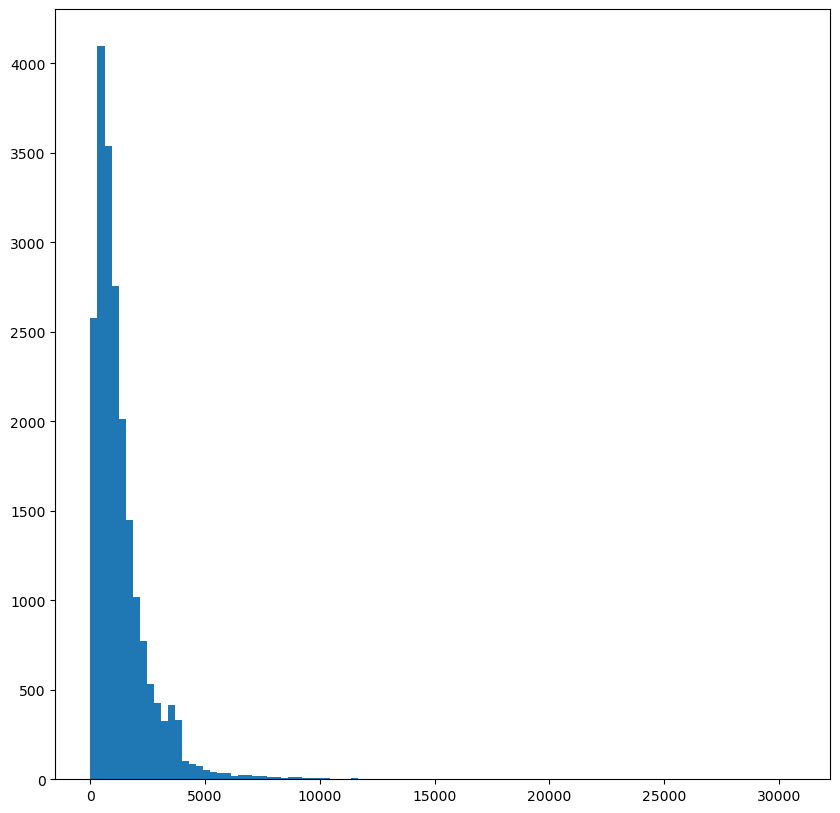

In [26]:
#Vizulalize Complaint what happned
plt.figure(figsize=(10,10))
doc_length = [len(d) for d in df_clean.complaint_what_happened]
plt.hist(doc_length, bins = 100)

(array([3.968e+03, 5.139e+03, 3.783e+03, 2.554e+03, 1.653e+03, 1.076e+03,
        7.250e+02, 5.450e+02, 4.600e+02, 3.040e+02, 1.660e+02, 1.070e+02,
        9.400e+01, 5.700e+01, 4.000e+01, 3.200e+01, 3.600e+01, 2.800e+01,
        2.000e+01, 1.900e+01, 2.200e+01, 1.500e+01, 4.000e+00, 9.000e+00,
        7.000e+00, 4.000e+00, 6.000e+00, 5.000e+00, 6.000e+00, 2.000e+00,
        5.000e+00, 3.000e+00, 6.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 5.000e+00, 2.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

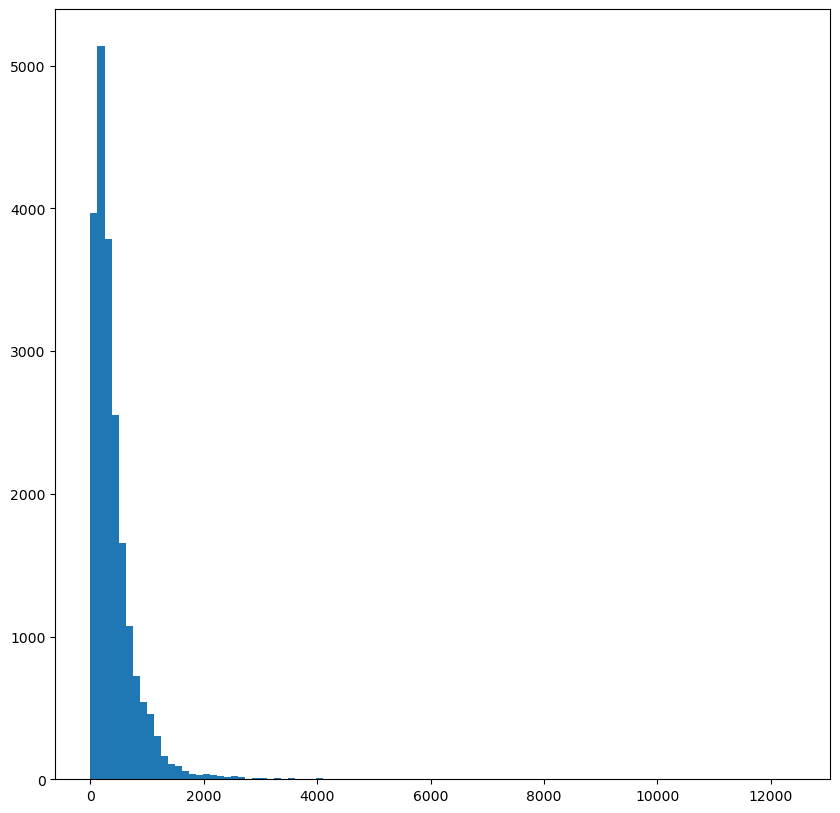

In [29]:
# Write your code here to visualise the data according to the 'Complaint pos tag removed' character length
plt.figure(figsize=(10,10))
doc_length = [len(d) for d in df_clean.complaint_POS_removed]
plt.hist(doc_length, bins = 100)


(array([3.599e+03, 5.102e+03, 3.823e+03, 2.582e+03, 1.697e+03, 1.073e+03,
        7.730e+02, 5.610e+02, 4.620e+02, 3.600e+02, 2.490e+02, 1.480e+02,
        8.800e+01, 6.200e+01, 6.100e+01, 2.800e+01, 3.500e+01, 2.500e+01,
        3.200e+01, 2.100e+01, 1.700e+01, 9.000e+00, 1.300e+01, 1.200e+01,
        1.000e+01, 1.200e+01, 9.000e+00, 6.000e+00, 7.000e+00, 3.000e+00,
        2.000e+00, 2.000e+00, 6.000e+00, 4.000e+00, 3.000e+00, 1.000e+00,
        3.000e+00, 4.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 5.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

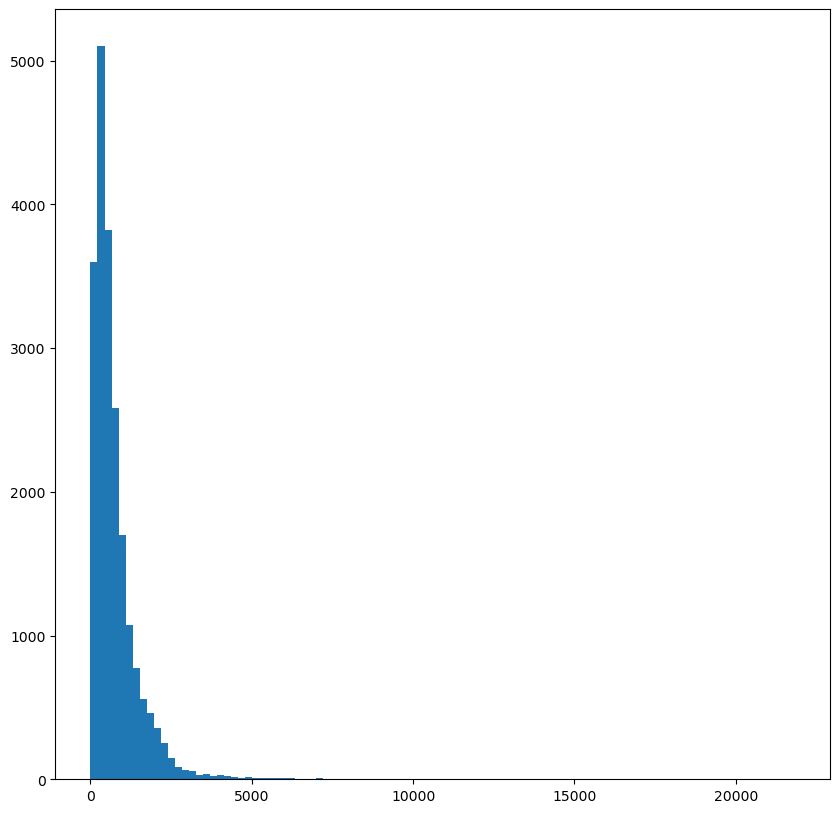

In [30]:
#Vizulalize Complaint_lemma 
plt.figure(figsize=(10,10))
doc_length = [len(d) for d in df_clean.complaints_lemma]
plt.hist(doc_length, bins = 100)


#### Find the top 40 words by frequency among all the articles after processing the text.

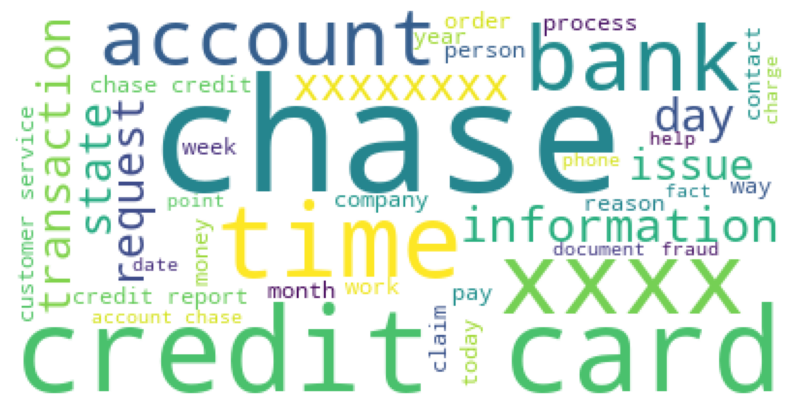

In [31]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
from wordcloud import WordCloud

wordcloud = WordCloud(stopwords=stopwords,background_color='white',max_words=40).generate(str(df_clean.complaint_POS_removed))

print(wordcloud)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [32]:
#Removing -PRON- from the text corpus
df_clean['Complaint_clean'] = df_clean['complaint_POS_removed'].str.replace('-PRON-', '')

In [33]:
df_clean.head()

,complaint_what_happened,complaints_lemma,complaint_POS_removed,Complaint_clean
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning xxxx xxxx appreciate help stop chase bank cardmember service \n write chase ask debt verification send statement acceptable ask bank validate debt instead receive mail month attempt collect debt \n right know information consumer \n\n chase account xxxx xxxx xxxx xxxx thank advance help,morning help bank service chase debt verification statement bank validate debt mail month attempt debt information consumer chase account xxxx help,morning help bank service chase debt verification statement bank validate debt mail month attempt debt information consumer chase account xxxx help
2,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,upgrade xxxx xxxx card tell agent upgrade anniversary date change turn agent give wrong information order upgrade account xxxx change anniversary date xxxxxxxx xxxxxxxx consent xxxx recording agent mislead,card agent upgrade anniversary date change agent information order account anniversary date agent,card agent upgrade anniversary date change agent information order account anniversary date agent
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card report fraudulent application submit identity consent fraudulently obtain service extend credit verify identity applicant,chase card report application submit identity consent service extend credit verify identity applicant,chase card report application submit identity consent service extend credit verify identity applicant
11,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,try book xxxx xxxx ticket come offer apply ticket apply reward card information offer minute notify screen decision immediatel

#### Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.

In [34]:
#Write your code here to find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean). 
def get_top_n_U_B_Tgram(text, ngram=1, top=None):
    vec = CountVectorizer(ngram_range=(ngram, ngram), stop_words='english').fit(text)
    bag_of_words = vec.transform(text)

    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top]
top_30_unigrams = get_top_n_U_B_Tgram(df_clean.Complaint_clean,ngram=1, top=30)


In [35]:
#Print the top 10 words in the unigram frequency
print('Top 10 unigrams:\n')
top_30_unigrams[:10]


Top 10 unigrams:



[('chase', 53371),
 ('account', 40882),
 ('credit', 33332),
 ('xxxx', 31274),
 ('card', 29776),
 ('payment', 21031),
 ('bank', 17036),
 ('time', 15858),
 ('charge', 15288),
 ('day', 12801)]

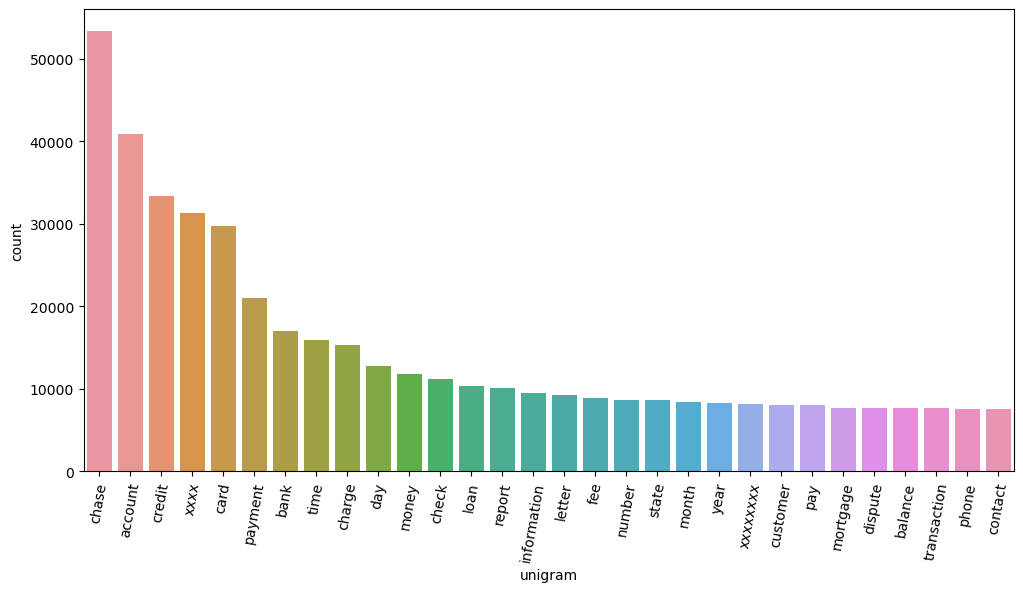

In [36]:
#Plot graph for the top 30 words in the unigram frequency
df1 = pd.DataFrame(top_30_unigrams, columns = ['unigram' , 'count'])
plt.figure(figsize=(12,6))
fig = sns.barplot(x=df1['unigram'], y=df1['count'])
plt.xticks(rotation = 80)
plt.show()


In [37]:
#Write your code here to find the top 30 bigram frequency among the complaints in the cleaned datafram(df_clean). 
top_30_bigrams = get_top_n_U_B_Tgram(df_clean.Complaint_clean,ngram=2, top=30)

In [38]:
print('Top 30 bigrams:\n')
top_30_bigrams[:30]

Top 30 bigrams:



[('credit card', 12747),
 ('credit report', 3808),
 ('chase credit', 3061),
 ('customer service', 2921),
 ('account chase', 2431),
 ('chase bank', 2118),
 ('check account', 2112),
 ('chase account', 2029),
 ('xxxx xxxx', 1956),
 ('contact chase', 1892),
 ('debit card', 1877),
 ('credit score', 1695),
 ('bank account', 1615),
 ('account account', 1602),
 ('number xxxx', 1566),
 ('chase card', 1536),
 ('card chase', 1529),
 ('card account', 1529),
 ('xxxx credit', 1361),
 ('phone number', 1248),
 ('account credit', 1189),
 ('letter chase', 1141),
 ('money account', 1131),
 ('chase customer', 1129),
 ('business day', 1124),
 ('credit account', 1119),
 ('account number', 1096),
 ('card company', 1095),
 ('payment chase', 1078),
 ('payment payment', 1071)]

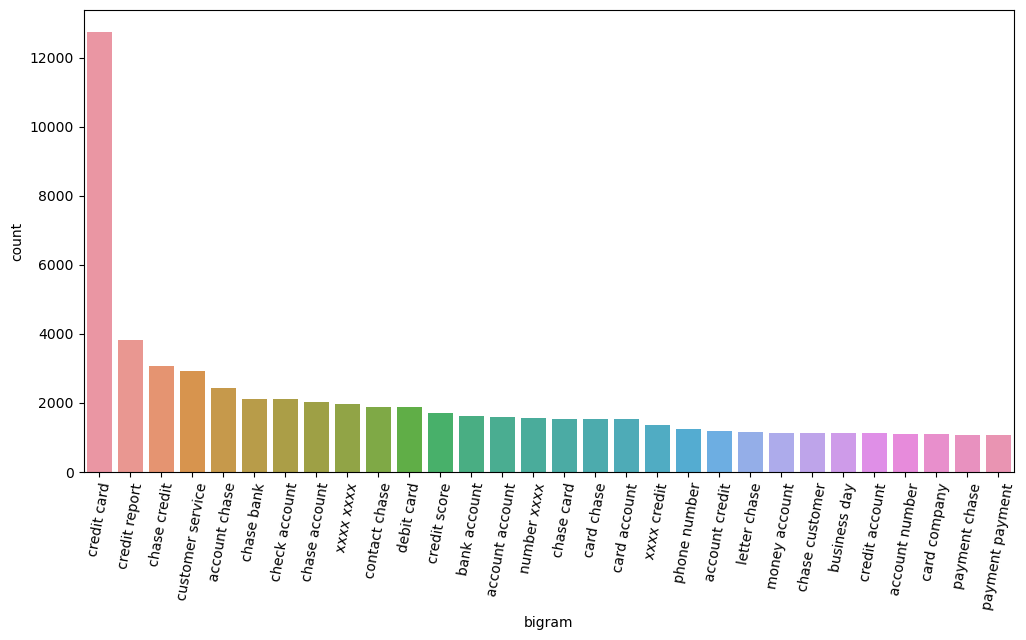

In [39]:
#Plot graph for the top 30 words in the bigram frequency
df2 = pd.DataFrame(top_30_bigrams, columns = ['bigram' , 'count'])
plt.figure(figsize=(12,6))
fig = sns.barplot(x=df2['bigram'], y=df2['count'])
plt.xticks(rotation = 80)
plt.show()

In [40]:
#Write your code here to find the top 30 trigram frequency among the complaints in the cleaned datafram(df_clean). 
top_30_trigrams = get_top_n_U_B_Tgram(df_clean.Complaint_clean,ngram=3, top=30)

In [41]:
#Print the top 10 words in the trigram frequency
print('Top 10 trigrams:\n')
top_30_trigrams[:10]

Top 10 trigrams:



[('chase credit card', 2190),
 ('credit card account', 1048),
 ('credit card company', 977),
 ('credit card chase', 736),
 ('xxxx credit card', 650),
 ('chase customer service', 559),
 ('inquiry credit report', 468),
 ('credit card credit', 426),
 ('charge credit card', 407),
 ('credit card xxxx', 384)]

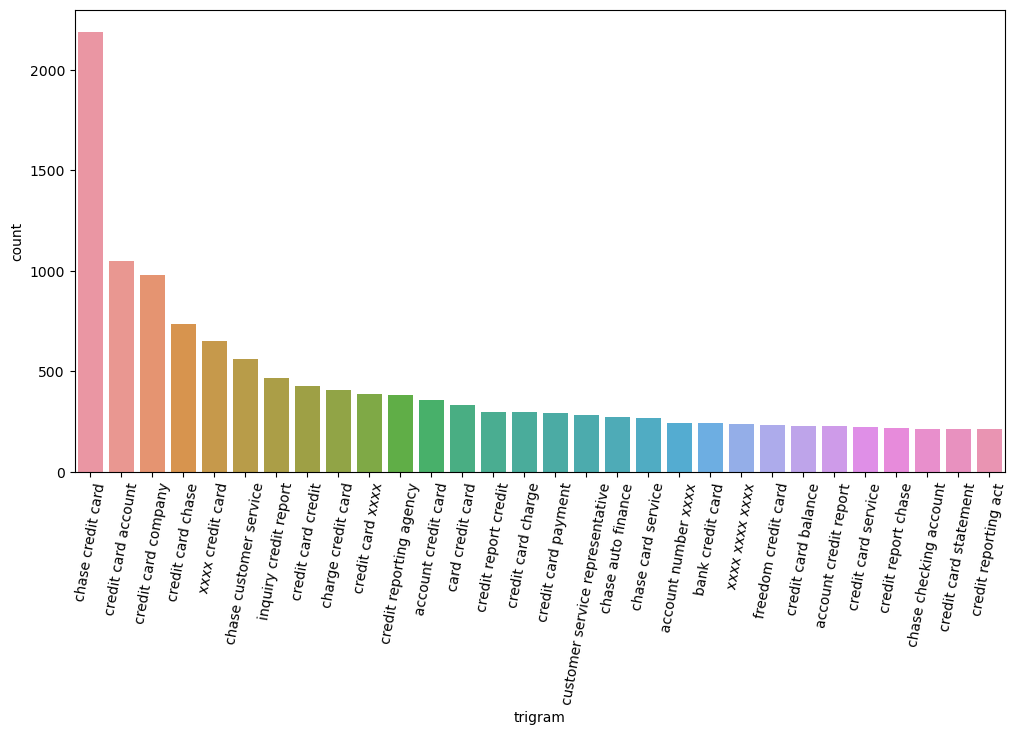

In [42]:
#Plot graph for the top 30 words in the trigram frequency
df3 = pd.DataFrame(top_30_trigrams, columns = ['trigram' , 'count'])
plt.figure(figsize=(12,6))
fig = sns.barplot(x=df3['trigram'], y=df3['count'])
plt.xticks(rotation = 80)
plt.show()

## The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis

In [43]:
df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace('xxxx','')

In [44]:
#All masked texts has been removed
df_clean.head()

,complaint_what_happened,complaints_lemma,complaint_POS_removed,Complaint_clean
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning xxxx xxxx appreciate help stop chase bank cardmember service \n write chase ask debt verification send statement acceptable ask bank validate debt instead receive mail month attempt collect debt \n right know information consumer \n\n chase account xxxx xxxx xxxx xxxx thank advance help,morning help bank service chase debt verification statement bank validate debt mail month attempt debt information consumer chase account xxxx help,morning help bank service chase debt verification statement bank validate debt mail month attempt debt information consumer chase account help
2,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,upgrade xxxx xxxx card tell agent upgrade anniversary date change turn agent give wrong information order upgrade account xxxx change anniversary date xxxxxxxx xxxxxxxx consent xxxx recording agent mislead,card agent upgrade anniversary date change agent information order account anniversary date agent,card agent upgrade anniversary date change agent information order account anniversary date agent
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card report fraudulent application submit identity consent fraudulently obtain service extend credit verify identity applicant,chase card report application submit identity consent service extend credit verify identity applicant,chase card report application submit identity consent service extend credit verify identity applicant
11,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,try book xxxx xxxx ticket come offer apply ticket apply reward card information offer minute notify screen decision immediately con

## Feature Extraction
Convert the raw texts to a matrix of TF-IDF features

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

**min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [45]:
#Write your code here to initialise the TfidfVectorizer
tfidf = TfidfVectorizer(min_df=2, max_df=0.95, stop_words='english')

#### Create a document term matrix using fit_transform

The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score:
The tuples that are not there have a tf-idf score of 0

In [46]:
#Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean.
dtm=tfidf.fit_transform(df_clean.Complaint_clean)

## Topic Modelling using NMF

Non-Negative Matrix Factorization (NMF) is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

In this task you have to perform the following:

* Find the best number of clusters 
* Apply the best number to create word clusters
* Inspect & validate the correction of each cluster wrt the complaints 
* Correct the labels if needed 
* Map the clusters to topics/cluster names

In [47]:
from sklearn.decomposition import NMF

## Manual Topic Modeling
You need to do take the trial & error approach to find the best num of topics for your NMF model.

The only parameter that is required is the number of components i.e. the number of topics we want. This is the most crucial step in the whole topic modeling process and will greatly affect how good your final topics are.

In [48]:
#Load your nmf_model with the n_components i.e 5
num_topics = 5   #write the value you want to test out

#keep the random_state =40
nmf_model =NMF(n_components=5, random_state=40)          #write your code here

In [49]:
nmf_model.fit(dtm)
len(tfidf.get_feature_names_out())

6479

In [50]:
tfidf.get_feature_names_out()

array(['aarp', 'abandonment', 'abatement', ..., 'zombie', 'zone', 'zoom'],
      dtype=object)

In [51]:
#Print the Top15 words for each of the topics
for index, topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC Number {index}')
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC Number 0
['claim', 'customer', 'transaction', 'business', 'number', 'transfer', 'day', 'branch', 'fund', 'chase', 'deposit', 'bank', 'money', 'check', 'account']


THE TOP 15 WORDS FOR TOPIC Number 1
['reporting', 'year', 'letter', 'application', 'limit', 'debt', 'information', 'company', 'score', 'account', 'chase', 'inquiry', 'report', 'card', 'credit']


THE TOP 15 WORDS FOR TOPIC Number 2
['mortgage', 'account', 'year', 'credit', 'date', 'auto', 'chase', 'time', 'day', 'fee', 'statement', 'pay', 'month', 'balance', 'payment']


THE TOP 15 WORDS FOR TOPIC Number 3
['statement', 'time', 'email', 'refund', 'fraud', 'service', 'claim', 'merchant', 'purchase', 'transaction', 'fee', 'chase', 'card', 'dispute', 'charge']


THE TOP 15 WORDS FOR TOPIC Number 4
['refinance', 'sale', 'request', 'foreclosure', 'time', 'document', 'rate', 'letter', 'year', 'property', 'modification', 'home', 'chase', 'mortgage', 'loan']




In [52]:
topic_values = nmf_model.transform(dtm)
topic_values.argmax(axis=1)

array([4, 1, 1, ..., 3, 2, 2], dtype=int64)

In [53]:
df_clean.head()


,complaint_what_happened,complaints_lemma,complaint_POS_removed,Complaint_clean
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning xxxx xxxx appreciate help stop chase bank cardmember service \n write chase ask debt verification send statement acceptable ask bank validate debt instead receive mail month attempt collect debt \n right know information consumer \n\n chase account xxxx xxxx xxxx xxxx thank advance help,morning help bank service chase debt verification statement bank validate debt mail month attempt debt information consumer chase account xxxx help,morning help bank service chase debt verification statement bank validate debt mail month attempt debt information consumer chase account help
2,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,upgrade xxxx xxxx card tell agent upgrade anniversary date change turn agent give wrong information order upgrade account xxxx change anniversary date xxxxxxxx xxxxxxxx consent xxxx recording agent mislead,card agent upgrade anniversary date change agent information order account anniversary date agent,card agent upgrade anniversary date change agent information order account anniversary date agent
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card report fraudulent application submit identity consent fraudulently obtain service extend credit verify identity applicant,chase card report application submit identity consent service extend credit verify identity applicant,chase card report application submit identity consent service extend credit verify identity applicant
11,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,try book xxxx xxxx ticket come offer apply ticket apply reward card information offer minute notify screen decision immediately con

In [54]:
#Assign the best topic to each of the cmplaints in Topic Column
df_clean['Topic'] =topic_values.argmax(axis=1)

In [55]:
df_clean.head()

,complaint_what_happened,complaints_lemma,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning xxxx xxxx appreciate help stop chase bank cardmember service \n write chase ask debt verification send statement acceptable ask bank validate debt instead receive mail month attempt collect debt \n right know information consumer \n\n chase account xxxx xxxx xxxx xxxx thank advance help,morning help bank service chase debt verification statement bank validate debt mail month attempt debt information consumer chase account xxxx help,morning help bank service chase debt verification statement bank validate debt mail month attempt debt information consumer chase account help,4
2,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,upgrade xxxx xxxx card tell agent upgrade anniversary date change turn agent give wrong information order upgrade account xxxx change anniversary date xxxxxxxx xxxxxxxx consent xxxx recording agent mislead,card agent upgrade anniversary date change agent information order account anniversary date agent,card agent upgrade anniversary date change agent information order account anniversary date agent,1
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card report fraudulent application submit identity consent fraudulently obtain service extend credit verify identity applicant,chase card report application submit identity consent service extend credit verify identity applicant,chase card report application submit identity consent service extend credit verify identity applicant,1
11,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,try book xxxx xxxx ticket come offer apply ticket apply reward card information offer minute notify screen decision imm

In [56]:
#Print the first 5 Complaint for each of the Topics
#df_clean=df_clean.groupby('Topic').head(5)
#df_clean.sort_values('Topic')
df_clean.groupby('Topic').head(5).sort_values(by='Topic')

,complaint_what_happened,complaints_lemma,complaint_POS_removed,Complaint_clean,Topic
14,my grand son give me check for i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase times they told him i should call not him to verify the check owner he is out the country most the time date happen check number xxxx claim number is xxxx with chase,grand son check deposit chase account fund clear chase bank close account pay money say need speek grand son check clear money take chase bank refuse pay money grand son call chase time tell verify check owner country time date happen check number xxxx claim number xxxx chase,son deposit chase account fund bank account pay money speek son money bank money son call chase time check owner country time date check number claim number chase,son deposit chase account fund bank account pay money speek son money bank money son call chase time check owner country time date check number claim number chase,0
17,with out notice jp morgan chase restricted my account by my debit card tuesday on thursday i went into a branch after being advised by a customer service representative that my account would actually be closed i went into the branch to see how i can remove the funds that are in there currently in as well as if my direct deposit from my place of employment would be returned the bank associate and the customer service representative assured me that the funds would post but they may take an additional business day that saturday i attempted to go inside of a branch yet again to retrieve my funds that actually did post on friday upon looking at my account i realize that the funds have been reversed and no longer were present on my current statement ive been called and i was told that it may take two business day stating tuesday xxxxxxxx would be the date that my funds would be available to withdraw from a bank teller only now chase is informing me that i will be mailed a check into the three business days to recover the funds that are owed to me and left in my account currently unfortunately this has put me in an additional financial bind do two fees from late rent late car payments etc i am not being a short or giving written notice that these things will actually occur so that i have peace of mind in fact chase has handled my situation grossly i even had a bank teller inform me that my account looks suspicious after giving me a suspicious look myself although i know that chase reserves the right to close my account at any time i do believe that their protocol has been in the past to give notice in the form of a written document i am not being a shored or giving written notice that these things will actually occur so that i have peace of mind in fact chase has handled my situation grossly i even had a bank teller inform me that my account looks suspicious after giving me a suspicious look myself although i know that chase reserves the right to close my account at any time i do believe that their protocol has been in the past to give notice in the form of a written document this situation is truly affecting my livelihood and they dont seem to want to deal with me professionally thank you,notice jp morgan chase restrict account debit card tuesday thursday go branch advise customer service representative account actually close go branch remove fund currently direct deposit place employment return bank associate customer service representative assure fund post additional business day saturday attempt inside branch retrieve fund actually post friday look account realize fund reverse long present current statement ve call tell business day state tuesday xxxxxxxx date fund available withdraw bank teller chase inform mail check business day recover fund owe leave account currently unfortunately additional finan

#### After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:
* Bank Account services
* Credit card or prepaid card
* Theft/Dispute Reporting
* Mortgage/Loan
* Others

## Supervised model to predict any new complaints to the relevant Topics.

You have now build the model to create the topics for each complaints.Now in the below section you will use them to classify any new complaints.

Since you will be using supervised learning technique we have to convert the topic names to numbers(numpy arrays only understand numbers)

In [57]:
#Create the dictionary of Topic names and Topics

Topic_names = {    
    0: 'Bank Account services',
    1: 'Credit card or prepaid card',
    2: 'Others',
    3: 'Theft/Dispute Reporting',
    4: 'Mortgage/Loan' 
}
#Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(Topic_names)

In [58]:
df_clean.head(15)

,complaint_what_happened,complaints_lemma,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning xxxx xxxx appreciate help stop chase bank cardmember service \n write chase ask debt verification send statement acceptable ask bank validate debt instead receive mail month attempt collect debt \n right know information consumer \n\n chase account xxxx xxxx xxxx xxxx thank advance help,morning help bank service chase debt verification statement bank validate debt mail month attempt debt information consumer chase account xxxx help,morning help bank service chase debt verification statement bank validate debt mail month attempt debt information consumer chase account help,Mortgage/Loan
2,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,upgrade xxxx xxxx card tell agent upgrade anniversary date change turn agent give wrong information order upgrade account xxxx change anniversary date xxxxxxxx xxxxxxxx consent xxxx recording agent mislead,card agent upgrade anniversary date change agent information order account anniversary date agent,card agent upgrade anniversary date change agent information order account anniversary date agent,Credit card or prepaid card
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card report fraudulent application submit identity consent fraudulently obtain service extend credit verify identity applicant,chase card report application submit identity consent service extend credit verify identity applicant,chase card report application submit identity consent service extend credit verify identity applicant,Credit card or prepaid card
11,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,try book xxxx xxxx ticket come offer apply ticket apply

In [59]:
#Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data
training_data=df_clean[['complaint_what_happened','Topic']]

In [60]:
training_data.head()

,complaint_what_happened,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,Mortgage/Loan
2,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,Credit card or prepaid card
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,Credit card or prepaid card
11,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,Credit card or prepaid card
14,my grand son give me check for i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase times they told him i should call not him to verify the check owner he is out the country most the time date happen check number xxxx claim number is xxxx with chase,Bank Account services


####Apply the supervised models on the training data created. In this process, you have to do the following:
* Create the vector counts using Count Vectoriser
* Transform the word vecotr to tf-idf
* Create the train & test data using the train_test_split on the tf-idf & topics


In [61]:
from sklearn.feature_extraction.text import TfidfTransformer

In [62]:
#Write your code to get the Vector count
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(training_data.complaint_what_happened)

#Write your code here to transform the word vector to tf-idf
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

You have to try atleast 3 models on the train & test data from these options:
* Logistic regression
* Decision Tree
* Random Forest
* Naive Bayes (optional)

**Using the required evaluation metrics judge the tried models and select the ones performing the best**

In [63]:
Topic_names = {    
    0: 'Bank Account services',
    1: 'Credit card or prepaid card',
    2: 'Others',
    3: 'Theft/Dispute Reporting',
    4: 'Mortgage/Loan' 
}

In [64]:
# Write your code here to build any 3 models and evaluate them using the required metrics
Topic_names = {'Bank Account services':0, 'Credit card or prepaid card':1, 'Others':2, 'Theft/Dispute Reporting':3, 'Mortgage/Loan':4}
training_data['Topic'] = training_data['Topic'].map(Topic_names)


In [65]:
training_data.head()

,complaint_what_happened,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,4
2,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,1
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,1
11,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,1
14,my grand son give me check for i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase times they told him i should call not him to verify the check owner he is out the country most the time date happen check number xxxx claim number is xxxx with chase,0


In [66]:
training_data.shape

(20930, 2)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [68]:
from sklearn.model_selection import StratifiedKFold,GridSearchCV,train_test_split

In [69]:
from sklearn.metrics import roc_auc_score,accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [70]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.Topic, test_size=0.2, random_state=42)

In [71]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((16744, 33599), (4186, 33599), (16744,), (4186,))

## Model Building

**1. Logistic Regression**

In [72]:
# Logistic Regression
lr = LogisticRegression(random_state=42)

In [73]:
param= {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2','none'],
    'max_iter': [100, 200, 300]
}


In [74]:
grid_search = GridSearchCV(estimator=lr, param_grid=param,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')


In [75]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'none']},
             scoring='accuracy', verbose=2)

In [76]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'C': 10, 'max_iter': 200, 'penalty': 'l2'}
Best Score: 0.9126851646722768


In [77]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [78]:
print(f"Test set accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Test set accuracy: 0.9216435738174868
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       985
           1       0.92      0.94      0.93       976
           2       0.95      0.89      0.92       477
           3       0.92      0.90      0.91       993
           4       0.91      0.93      0.92       755

    accuracy                           0.92      4186
   macro avg       0.92      0.92      0.92      4186
weighted avg       0.92      0.92      0.92      4186



In [79]:
Accuracy_logistic=accuracy_score(y_test, y_pred)
Accuracy_logistic

0.9216435738174868

#### Random Forest

In [80]:
RF = RandomForestClassifier(random_state=42)

In [81]:
param_RF= {
    'n_estimators': [10, 20, 30,40],  # Number of trees in the forest
    'max_depth': [10, 20, 30,50],  # Maximum number of levels in tree
    'min_samples_split': [5, 15,20],  # Minimum number of samples required to split a node
    'min_samples_leaf': [5, 15,20],  # Minimum number of samples required at each leaf node
}

In [82]:
grid_search_R= GridSearchCV(estimator=RF, param_grid=param_RF, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

In [83]:
# Fit the model using GridSearchCV
grid_search_R.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 50],
                         'min_samples_leaf': [5, 15, 20],
                         'min_samples_split': [5, 15, 20],
                         'n_estimators': [10, 20, 30, 40]},
             scoring='accuracy', verbose=1)

In [84]:
best_model_R = grid_search_R.best_estimator_
y_pred_R = best_model_R.predict(X_test)

In [85]:
# Get the best parameters and best score
best_params_R = grid_search_R.best_params_
best_score_R = grid_search_R.best_score_
print("Best Parameters:", best_params_R)
print("Best Score:", best_score_R)

Best Parameters: {'max_depth': 50, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 40}
Best Score: 0.7777113694667321


In [86]:
print(f"Test set accuracy: {accuracy_score(y_test, y_pred_R)}")
print(classification_report(y_test, y_pred_R))

Test set accuracy: 0.7730530339225992
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       985
           1       0.73      0.84      0.78       976
           2       0.87      0.29      0.43       477
           3       0.80      0.80      0.80       993
           4       0.81      0.80      0.81       755

    accuracy                           0.77      4186
   macro avg       0.79      0.72      0.73      4186
weighted avg       0.78      0.77      0.76      4186



In [87]:
Accuracy_logistic_R=accuracy_score(y_test, y_pred_R)
Accuracy_logistic_R

0.7730530339225992

### Decision Tree


In [88]:
DT = DecisionTreeClassifier(random_state=42)

In [91]:
param_DT = {
    'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
    'max_depth': [30, 40,50],  # Maximum depth of the tree
    'min_samples_split': [10, 20,30],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [3,5,7],  # Minimum number of samples required to be at a leaf node
}

In [92]:
grid_search_DT = GridSearchCV(estimator=DT, param_grid=param_DT, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

In [93]:
grid_search_DT.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [30, 40, 50],
                         'min_samples_leaf': [3, 5, 7],
                         'min_samples_split': [10, 20, 30]},
             scoring='accuracy', verbose=1)

In [94]:
best_model_DT = grid_search_DT.best_estimator_
y_pred_DT= best_model_DT.predict(X_test)

In [95]:
# Get the best parameters and best score
best_params_DT = grid_search_DT.best_params_
best_score_DT = grid_search_DT.best_score_
print("Best Parameters:", best_params_DT)
print("Best Score:", best_score_DT)

Best Parameters: {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 7, 'min_samples_split': 30}
Best Score: 0.7851770870457239


In [96]:
print(f"Test set accuracy: {accuracy_score(y_test, y_pred_DT)}")
print(classification_report(y_test, y_pred_DT))

Test set accuracy: 0.7895365504061156
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       985
           1       0.81      0.83      0.82       976
           2       0.79      0.79      0.79       477
           3       0.77      0.72      0.75       993
           4       0.77      0.79      0.78       755

    accuracy                           0.79      4186
   macro avg       0.79      0.79      0.79      4186
weighted avg       0.79      0.79      0.79      4186



In [97]:
Accuracy_logistic_DT=accuracy_score(y_test, y_pred_DT)
Accuracy_logistic_DT

0.7895365504061156

### Naive Bayes 


In [98]:
mnb = MultinomialNB()

In [99]:
param_mnb = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0], 'fit_prior': [True, False]}

In [100]:
grid_search_mnb = GridSearchCV(estimator=mnb, param_grid=param_mnb, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

In [101]:
grid_search_mnb.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.5, 1.0, 5.0, 10.0],
                         'fit_prior': [True, False]},
             scoring='accuracy', verbose=1)

In [102]:
best_model_mnb = grid_search_mnb.best_estimator_
y_pred_mnb= best_model_mnb.predict(X_test)

In [103]:
# Get the best parameters and best score
best_params_mnb = grid_search_mnb.best_params_
best_score_mnb = grid_search_mnb.best_score_
print("Best Parameters:", best_params_mnb)
print("Best Score:", best_score_mnb)

Best Parameters: {'alpha': 0.1, 'fit_prior': False}
Best Score: 0.774904151206177


In [104]:
print(f"Test set accuracy: {accuracy_score(y_test, y_pred_mnb)}")
print(classification_report(y_test, y_pred_mnb))

Test set accuracy: 0.7840420449116101
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       985
           1       0.80      0.76      0.78       976
           2       0.68      0.65      0.66       477
           3       0.80      0.76      0.78       993
           4       0.83      0.83      0.83       755

    accuracy                           0.78      4186
   macro avg       0.78      0.77      0.77      4186
weighted avg       0.78      0.78      0.78      4186



In [105]:
Accuracy_logistic_mnb=accuracy_score(y_test, y_pred_mnb)
Accuracy_logistic_mnb

0.7840420449116101

# Final Results

| Model | Accuracy | Precision | Recall | F1 Score |
|-------|----------|-----------|--------|---------|
| Logistic Regression | 0.92 | 0.92 | 0.92 | 0.92 | 
| DecisionTreeClassifier | 0.78 | 0.79 | 0.79 | 0.79 |
| RandomForestClassifier | 0.77 | 0.78 | 0.77 | 0.76 |
| MultinomialNB | 0.78 | 0.78 | 0.78 | 0.78 | 0.78 |


# Conclusion
As from the results we can see that Logistic Regression is  performing the best with an accuracy score of 0.92. So using this models to predict the topics for the new complaints.

## Model Inference	

In [113]:
df_complaints = pd.DataFrame({'complaints': ["I didn't receive my new credit card after reporting the old one lost","I can not get from chase who services my mortgage, who owns it and who has original loan docs",
                                  "The bill amount of my credit card was debited twice. Please look into the matter and resolve at the earliest.",
                                  "I want to open a salary account at your downtown branch. Please provide me the procedure.",
                                  "I need to know the number of bank branches and their locations in the city of Dubai",                                
                                  "I am writing to express my concern regarding an unauthorized withdrawal from my account. On August 15th, I noticed a withdrawal of $700 that I did not authorize. I contacted your support team immediately and was advised to submit a formal dispute.This unauthorized transaction has significantly impacted my financial situation, and I am deeply"
                                     ]})

In [114]:
def predict_Model(text):
    #Topic_names = {0:'Account Services', 1:'Others', 2:'Mortgage/Loan', 3:'Credit card or prepaid card', 4:'Theft/Dispute Reporting'}
    Topic_names = {    
    0: 'Bank Account services',
    1: 'Credit card or prepaid card',
    2: 'Others',
    3: 'Theft/Dispute Reporting',
    4: 'Mortgage/Loan' 
}
    X_new_counts = count_vect.transform(text)
    X_new_tfidf = tfidf_transformer.transform(X_new_counts)
    predicted = best_model.predict(X_new_tfidf)
    return Topic_names[predicted[0]]

In [115]:
df_complaints['topic_pred'] = df_complaints['complaints'].apply(lambda x: predict_Model([x]))
df_complaints

,complaints,topic_pred
0,I didn't receive my new credit card after reporting the old one lost,Credit card or prepaid card
1,"I can not get from chase who services my mortgage, who owns it and who has original loan docs",Mortgage/Loan
2,The bill amount of my credit card was debited twice. Please look into the matter and resolve at the earliest.,Credit card or prepaid card
3,I want to open a salary account at your downtown branch. Please provide me the procedure.,Bank Account services
4,I need to know the number of bank branches and their locations in the city of Dubai,Bank Account services
5,"I am writing to express my concern regarding an unauthorized withdrawal from my account. On August 15th, I noticed a withdrawal of $700 that I did not authorize. I contacted your support team immediately and was advised to submit a formal dispute.This unauthorized transaction has significantly impacted my financial situation, and I am deeply",Theft/Dispute Reporting


Model inference is done using Logistic Regression Model on unseen user Complaints.